# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

## 릿지 회귀

앞 예제의 보스턴 주택 가격을 Ridge 클래스를 이용해 다시 예측하고, 예측 성능을 cross_val_score()로 평가

In [1]:
# 데이터 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# boston 데이터 세트 로드
boston_df = pd.read_csv('./data/BostonHousing.csv')

print('boston 데이터 세트 크기 : ', boston_df.shape)
boston_df.head()

boston_df = boston_df.drop(['CAT. MEDV'], axis = 1, inplace = False)

# 데이터 나누기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['MEDV']
X_data = boston_df.drop(['MEDV'], axis = 1, inplace = False)

boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5folds의 평균 RMSE : {:.3f}'.format(avg_rmse))

5folds의 개별 Negative MSE scores :  [-11.583 -25.997 -29.133 -71.25  -31.116]
5folds의 개별 RMSE scores :  [3.403 5.099 5.397 8.441 5.578]
5folds의 평균 RMSE : 5.584


In [3]:
# 릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살피기
# 릿지에 사용될 alpha 파라미터의 값을 정의

alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {} 일때 5 folds의 평균 RMSE : {:.3f}'.format(alpha, avg_rmse))

alpha 0 일때 5 folds의 평균 RMSE : 5.773
alpha 0.1 일때 5 folds의 평균 RMSE : 5.745
alpha 1 일때 5 folds의 평균 RMSE : 5.659
alpha 10 일때 5 folds의 평균 RMSE : 5.584
alpha 100 일때 5 folds의 평균 RMSE : 5.442


Ridge(alpha=0)

Text(0.5, 1.0, 'alpha : 0')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0'}>

Ridge(alpha=0.1)

Text(0.5, 1.0, 'alpha : 0.1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 0.1'}>

Ridge(alpha=1)

Text(0.5, 1.0, 'alpha : 1')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 1'}>

Ridge(alpha=10)

Text(0.5, 1.0, 'alpha : 10')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 10'}>

Ridge(alpha=100)

Text(0.5, 1.0, 'alpha : 100')

(-3.0, 6.0)

<Axes: title={'center': 'alpha : 100'}>

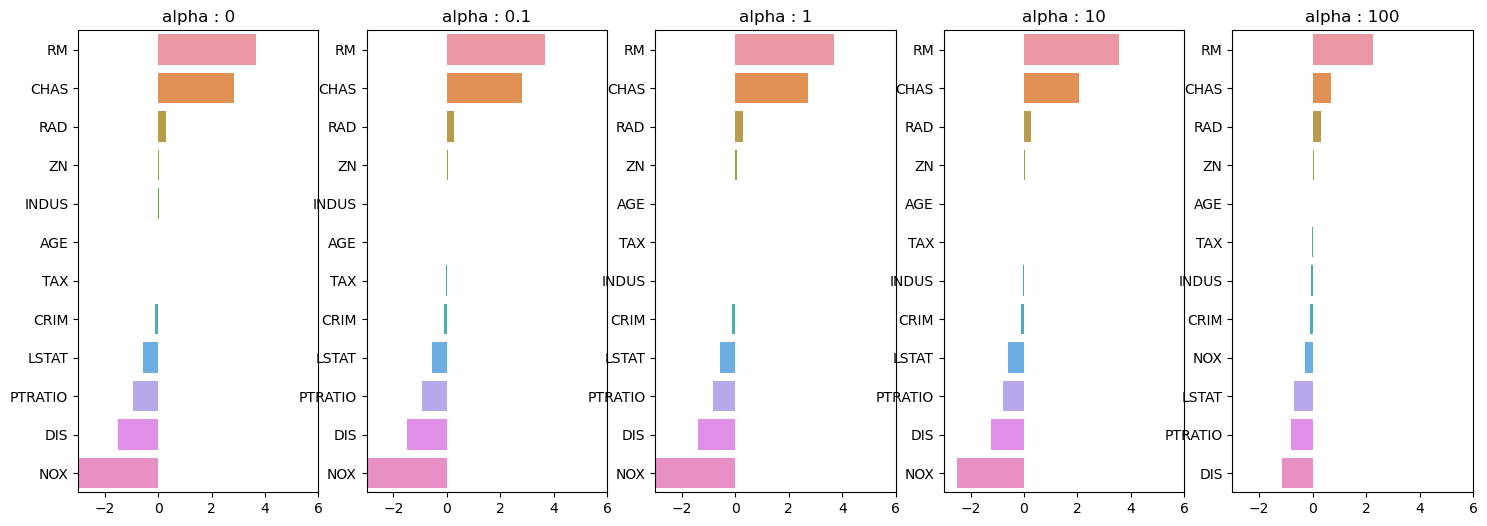

In [4]:
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위핸 DataFrame를 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례대로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 다른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha : '+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프 각 alpha값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
    
# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 dataframe로 표시
plt.show()

In [5]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha : ' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,3.658119,3.666261,3.701399,3.558849,2.253651
CHAS,2.839993,2.823289,2.703836,2.071141,0.671761
RAD,0.289405,0.286615,0.271825,0.259375,0.295906
ZN,0.046963,0.047125,0.048055,0.050232,0.054831
INDUS,0.013468,0.008610,-0.017854,-0.054085,-0.062140
AGE,0.003611,0.002612,-0.002751,-0.008428,0.002979
TAX,-0.012682,-0.012775,-0.013305,-0.014453,-0.016313
CRIM,-0.121389,-0.120906,-0.118324,-0.115526,-0.115481
LSTAT,-0.552019,-0.553451,-0.562037,-0.589156,-0.685498
PTRATIO,-0.937533,-0.924764,-0.855687,-0.771284,-0.803480


## 라쏘 회귀

In [6]:
# Lasso 클래스를 이용해 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환

def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print('##### ', model_name, '#####')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha = param)
        elif model_name == 'Lasso':
            model = Lasso(alpha = param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {} 일 때 5 폴드 세트의 평균 RMSE : {:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 반환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = 'alpha : ' + str(param)
            coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [7]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alpha = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alpha, X_data_n = X_data, y_target_n = y_target)

#####  Lasso #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.686
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.694
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.792
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.894
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 6.234


In [8]:
# 반환된 coeff_lasso_df를 첫 번째 컬럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력

sort_column = 'alpha : ' + str(lasso_alpha[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.632990,3.546455,2.355091,0.832446,0.000000
CHAS,1.595663,1.116519,0.000000,0.000000,0.000000
RAD,0.249808,0.253579,0.259166,0.250702,0.043064
ZN,0.049801,0.049953,0.050263,0.050046,0.037518
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.009482,-0.007813,0.005802,0.022662,0.042981
TAX,-0.014756,-0.015035,-0.015950,-0.015925,-0.009051
INDUS,-0.054631,-0.049131,-0.015646,-0.000000,-0.000000
CRIM,-0.112437,-0.112139,-0.096775,-0.074909,-0.000000
LSTAT,-0.591606,-0.599945,-0.685666,-0.787480,-0.824538


## 엘라스틱넷 회귀

In [9]:
# l1_ratio를 0.7로 고정 -> 단순히 alpha값의 변화만 살피기 위해
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_raio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

#####  ElasticNet #####
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 5.622
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.614
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 5.590
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.702
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 6.126


In [11]:
# 반환된 coeff_elastic_df를 첫 번쩨 컬럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha : ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.430244,3.276725,1.831157,0.880772,0.000000
CHAS,1.448952,1.084738,0.000000,0.000000,0.000000
RAD,0.258474,0.262816,0.282231,0.272363,0.133588
ZN,0.050762,0.051264,0.053269,0.052385,0.038418
AGE,-0.007826,-0.006138,0.009557,0.021816,0.044156
TAX,-0.014987,-0.015290,-0.016511,-0.016662,-0.011946
INDUS,-0.056076,-0.054291,-0.032292,-0.007016,-0.000000
CRIM,-0.113679,-0.113311,-0.102022,-0.085375,-0.028894
NOX,-0.310891,-0.000000,-0.000000,-0.000000,-0.000000
LSTAT,-0.604837,-0.617448,-0.718662,-0.781633,-0.815268


## 선형 회귀 모델을 위한 데이터 변환

보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변화느 최댓값/최솟값 정규화, 로그 변환을 차례로 적용

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그변환 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여X

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
    return scaled_data

In [13]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alpha = [0.1, 1, 10, 100]

# 5개 발식으로 변환. 먼저 원본 그대로, 표준 정규 분포, 표준정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환
scaled_methods = [(None, None), ('Standard', None), ('Standard', 2),
                  ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scaled_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    print('\n##변환 유형 : {}, Polynomial Degree {}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alpha, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)


##변환 유형 : None, Polynomial Degree None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.745
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.659
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 5.584
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 5.442


""



##변환 유형 : Standard, Polynomial Degree None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.771
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.755
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 5.637
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 5.488


""



##변환 유형 : Standard, Polynomial Degree 2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 7.579
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 6.645
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 5.405
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 4.621


""



##변환 유형 : MinMax, Polynomial Degree None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 5.724
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 5.506
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 5.840
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 7.655


""



##변환 유형 : MinMax, Polynomial Degree 2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 4.733
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 4.330
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 5.335
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 6.696


""



##변환 유형 : Log, Polynomial Degree None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 4.830
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 4.711
alpha 10 일 때 5 폴드 세트의 평균 RMSE : 4.859
alpha 100 일 때 5 폴드 세트의 평균 RMSE : 6.266


""
